Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_37 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_39 (Conv2D)          (None, 10, 10, 128)       147584    
                                                                 
 conv2d_40 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_41 (Conv2D)          (None, 6, 6, 128)        

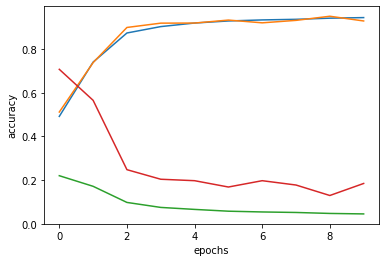

In [10]:
import numpy as np
import pandas as pd
import cv2
import glob
from sklearn.model_selection import train_test_split
from joblib import dump
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
labels=[]
features=[]
for address in glob.glob('C:\\Users\\Asus\\Desktop\\challange\\Training\\*\\*'):
    img=cv2.imread(address)
    img =cv2.resize(img,(32,32))
    img=img/255.0
    label=address.split('\\')
    labels.append(label[6])
    features.append(img)
features=np.array(features)
l_e=LabelEncoder()
int_encoding=l_e.fit_transform(labels)
one_hot_encoding=to_categorical(int_encoding,2)

X_train, X_test, y_train, y_test= train_test_split(features, one_hot_encoding, test_size=0.3)


Imbalanced_CNN=models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3) ),
    layers.Conv2D(64,(3,3),activation='relu' ),
    layers.Conv2D(64,(3,3),activation='relu' ),

    layers.Conv2D(128,(3,3),activation='relu',strides=(2, 2) ),
    layers.Conv2D(128,(3,3),activation='relu' ),
    layers.Conv2D(128,(3,3),activation='relu' ),
    layers.Conv2D(128,(3,3),activation='relu' ),

    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')
    
    
])


Imbalanced_CNN.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics=['accuracy'])
class_weight={0:0.2, 1:0.8}
print(Imbalanced_CNN.summary())  
n= Imbalanced_CNN.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), 
                      class_weight=class_weight)

Imbalanced_CNN.save('Imbalanced_CNN.h5')
plt.plot(n.history['accuracy'], label='train accuracy')
plt.plot(n.history['val_accuracy'], label='test accuracy')
plt.plot(n.history['loss'], label='train loss')
plt.plot(n.history['val_loss'], label='test loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()




